# Williams vs ATP Top 500
Group 18 Project Proposal by: Sandra Radic, Charlie Sushams, Clare Vu, & Alex Grinius

## Introduction


In the world of sports, events are often separated into male and female events. Therefore, female and male statistics are not usually compared in one group. However, is this necessary for all sports? In this report, we aim to analyze this question through the lens of Tennis. For example, there are many outstanding female players on the professional tennis circuit. Serena Williams, notably, is one of the most decorated female tennis players of all time, with 23 Grand Slam singles titles (Serena Wiki, 2021). This leads to our question: How would Serena Williams rank amongst the top 500 male players? **More specifically, can we predict how Serena Williams would rank amongst top male players using the metrics of height and number of seasons played as predictors?** To answer this question, we will be using the dataset collected from https://www.ultimatetennisstatistics.com/, which contains various data on the top 500 professional male tennis players. Using this data, we will categorize players into different classes, based on their best career rank achieved. Those who have ranked in the top ten will be assigned the label "top". Those who have ranked between 11 and 40 will be assigned the label "great". All other players will be assigned the label "good". The end result of our analysis, therefore, will be to predict which class Serena Williams would fall into, based upon her height and number of seasons played as a professional. 





## Methods and Results

### 1. Preliminary exploratory data analysis (reading the data)

In [2]:
library(tidyverse)
library(tidymodels)
library(repr)
library(cowplot)
library(scales)
library(stringr)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [3]:
#read in data
player_stats_link <- "https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS"
player_stats <- read_csv(player_stats_link)

head(player_stats)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  `Turned Pro` = col_double(),
  Seasons = col_double(),
  Titles = col_double(),
  `Best Season` = col_double(),
  Retired = col_double(),
  Masters = col_double(),
  `Grand Slams` = col_double(),
  `Davis Cups` = col_double(),
  `Team Cups` = col_double(),
  Olympics = col_double(),
  `Weeks at No. 1` = col_double(),
  `Tour Finals` = col_double()
)

See spec(...) for full column specifications.



X1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,21 (29-05-1998),"Korea, Republic of",Right-handed,Wikipedia,236 (199),130 (10-04-2017),Duck Hee Lee,Two-handed,"$374,093",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,27 (21-10-1992),Australia,Right-handed,Wikipedia,183 (273),17 (11-01-2016),Bernard Tomic,Two-handed,"US$6,091,971",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,22 (11-02-1997),Poland,Right-handed,Wikipedia,31 (1398),31 (20-01-2020),Hubert Hurkacz,Two-handed,"$1,517,157",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


**Figure 1.1**

### 2. Data Wrangling

There are a couple of steps involved in wrangling and tidying our data. As briefly mentioned in our introduction, we decided to analyze the the player's **age turned pro, height, number of seasons played, and best career rank to date** as we felt these quantitative variables would make the most impact when comparing skill levels between players. Other information in the dataset (such as the country the player is from, or whether they played with their right or left hand) was not as relevant to our question.


- Firstly, to get the age the players turned pro, we needed to subtract the year the player was born in from the year the player turned pro. In order to access the year the player was born it, we had to separate the year from the date format using R commands `as.Date` and `format`. By doing this, we successfully achieved how old the player was when they turned pro. We deemed this as an important predictor because the younger a player turned pro, the better they would generally rank as they had more experience playing in a professional league.

- We decided to use the height of the players as another predictor because male athletes tend to be taller than female athletes. In tennis, height may also serve to be an advantage because it contributes to longer wingspans, larger strides across the court, and overall more movement in a shorter amount of time (Sackmann, 2018).

- The number of seasons played was chosen as a predictor similarly to the reason age turned pro was. We felt that players who have played longer in the professional setting are ranked higher, so this correlation will help determine the skill level association between players and their rank. 

In [4]:
# select only the necessary columns

player_stats_filtered <- player_stats %>%
    select('Best Rank', 'Height', 'Seasons', 'Name', 'Turned Pro', 'Age') %>%
     drop_na()

# tidy up dataframe (ensure correct datatypes and appropriate column names)

player_stats_tidy <- player_stats_filtered %>%
    separate(col = Age, into = c("Age", "Birthdate"), sep = " ") %>%
# separate(col = Birthdate, into = c("Year born"), sep = "-") %>%
    mutate(Age = as.numeric(Age)) %>%
    mutate_at("Height", str_replace, " cm", "") %>%
    mutate(Height = as.numeric(Height)) %>%
    rename(Height_cm = Height, Year_turned_pro = "Turned Pro", Best_career_rank_to_date = "Best Rank")

player_stats_tidy$Best_career_rank_to_date <- gsub(" .+", "", player_stats_tidy$Best_career_rank_to_date)

#separate year from date

get_date <- as.Date(player_stats_tidy$Birthdate, "(%d-%m-%Y)")
get_year <- format(get_date, format = "%Y")

player_stats_tidy$Birthdate <- as.double(get_year)
player_stats_tidy <- mutate(player_stats_tidy, Best_career_rank_to_date = as.integer(Best_career_rank_to_date))

# create new column that lists a player's age when they turned pro

player_stats_tidy <- player_stats_tidy %>%
     mutate(Age_turned_pro = Year_turned_pro - Birthdate) %>%
    add_column(player_level = "NA") %>%
    arrange(desc(Best_career_rank_to_date))#adds new column for future categories

head(player_stats_tidy, 15)

Best_career_rank_to_date,Height_cm,Seasons,Name,Year_turned_pro,Age,Birthdate,Age_turned_pro,player_level
<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
183,183,8,Laurynas Grigelis,2008,28,1991,17,NA
169,183,5,Brydan Klein,2005,30,1989,16,NA
110,180,13,Peter Polansky,2007,31,1988,19,NA
99,180,10,Pedro Sousa,2007,31,1988,19,NA
98,180,7,Andrej Martin,2005,30,1989,16,NA
89,190,12,James Ward,2006,32,1987,19,NA
85,188,11,Matthias Bachinger,2005,32,1987,18,NA
84,183,7,Alessandro Giannessi,2008,29,1990,18,NA
82,183,9,James Duckworth,2010,28,1992,18,NA


**Figure 2.1**

In order for us to conduct a classification analysis, we must have labelled categories to represent our levels, which in this case are to do with tennis player ranks as shown in Figure 2.2 below.

Our end goal is to sort Serena Williams into one of these categories based on her statistics compared with our training model.

In [5]:
# Give ranks meaningi by sorting them into categories

for (row in 1:nrow(player_stats_tidy)) {
    rank <- pull(player_stats_tidy[row, "Best_career_rank_to_date"])
    if(rank < 11) {
        player_stats_tidy[row, "player_level"] = "top" 
    } else if(rank > 10 & rank < 41) {
        player_stats_tidy[row, "player_level"] = "great"
    } else {
        player_stats_tidy[row, "player_level"] = "good"
    }
}

player_stats_tidy <- player_stats_tidy %>%
    mutate(player_level = as.factor(player_level)) %>%
    arrange(desc(player_level))
head(player_stats_tidy, 15)

Best_career_rank_to_date,Height_cm,Seasons,Name,Year_turned_pro,Age,Birthdate,Age_turned_pro,player_level
<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
10,188,9,Pablo Carreno Busta,2011,28,1991,20,top
10,185,7,Lucas Pouille,2012,25,1994,18,top
10,190,15,Ernests Gulbis,2004,31,1988,16,top
9,178,16,Fabio Fognini,2004,32,1987,17,top
9,183,11,Roberto Bautista Agut,2005,31,1988,17,top
8,180,17,Janko Tipsarevic,2002,35,1984,18,top
8,206,14,John Isner,2007,34,1985,22,top
8,183,16,Marcos Baghdatis,2003,34,1985,18,top
7,188,19,Fernando Verdasco,2001,36,1983,18,top


**Figure 2.2**

Using the information found on the Serena Williams Wikipedia page, we assign values to a data_frame. This data_frame will be used to eventually predict her player level.

In [6]:
# create a dataframe for Serena Williams - currently contains junk data
serena_data <- data.frame(Best_career_rank_to_date = 1, Height_cm = 175, Seasons = 24, 
                          Name = "Serena Williams", Year_turned_pro = 1995, Age = 38, Birthdate = 1981,
                          Age_turned_pro = 14)

# serena_data sourced from: https://en.wikipedia.org/wiki/Serena_Williams

### 3. Training the Classification Model

We will begin by splitting our training and testing data. In this analysis we will be using 70% of our data for training.

In [7]:
#split the player data into training and testing sets
set.seed(2021) #making sure data is reproducible

player_stats_split <- initial_split(player_stats_tidy, prop = 0.70, strata = player_level)

player_stats_training <- training(player_stats_split)
player_stats_testing <- testing(player_stats_split)



#### 3.1 Exploratory Data Analysis

After splitting the data into training and testing sets, we created both a visualization and a summary table of the training data, to help us better understand any potential trends or patterns in the data that will guide our analysis. Firstly, we created a scatterplot matrix to visualize the strength and direction of any correlations between the numeric variables in our dataset, if they exist (Figure 3.1.1). After that, we created a summary table that shows the proportions of each category, as well as the means of our variables of interest, grouped by category. This allows us to see if there are any obvious differences in the data across categories, as well as check to see if the categories are in roughly equal proportions, incase balancing is needed during analysis.

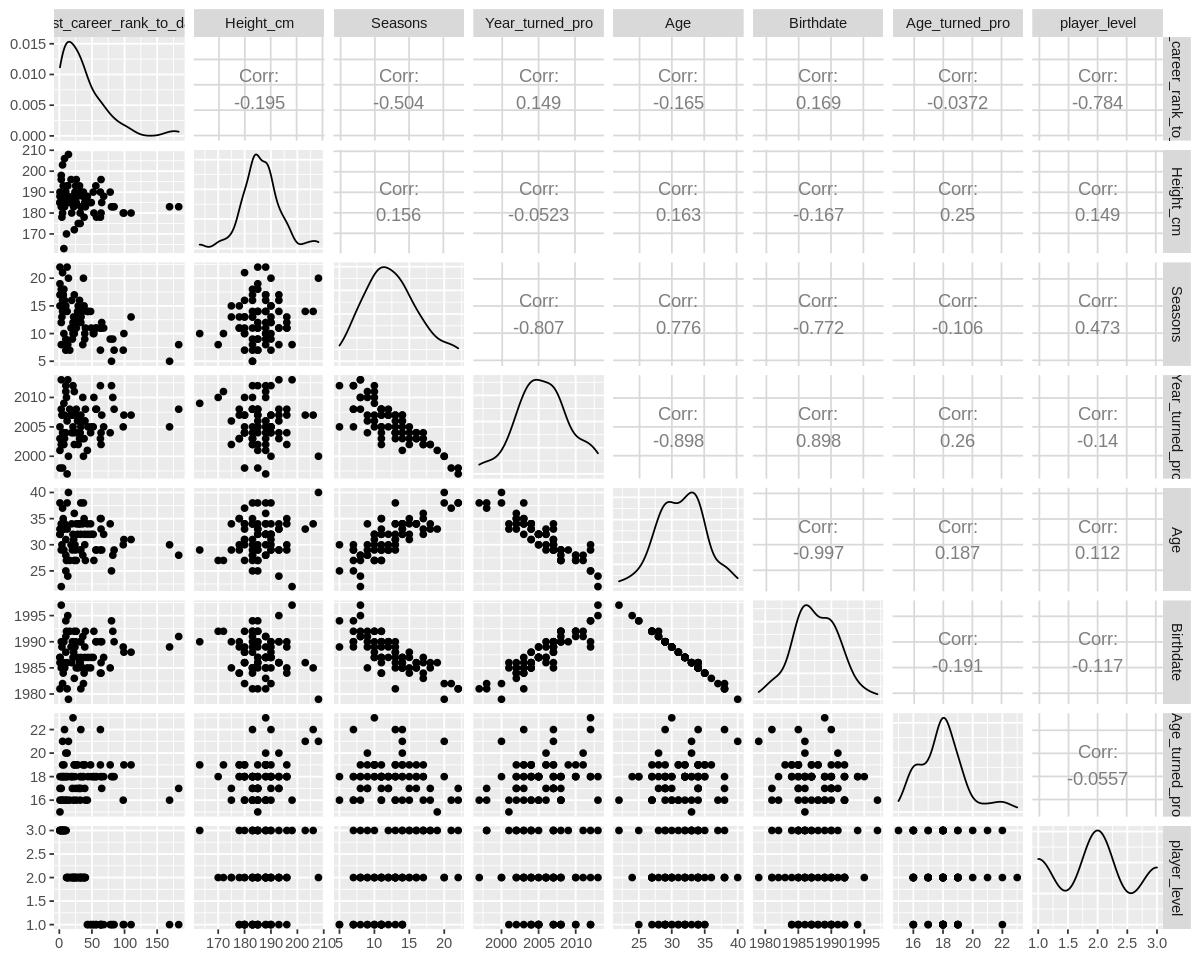

In [20]:
# options(repr.plot.width = 12, repr.plot.height = 12)
set.seed(2021)
explore_plot <- player_stats_training %>%
    select(everything(), -"Name") %>%
    mutate_all(as.numeric) %>%
    ggpairs()
explore_plot 

**Figure 3.1.1**

In [9]:
#create exploratory data frame that contains means of predictor variables
set.seed(2021)

player_stats_exploratory <- player_stats_training %>%
    group_by(player_level) %>%
    summarize(count = n(),
              percentage = n() / nrow(player_stats_training) * 100,
              mean_height_cm = mean(Height_cm, na.rm = TRUE),
              mean_number_pro_seasons = mean(Seasons, na.rm = TRUE),
              mean_age_turned_pro = mean(Age_turned_pro, na.rm = TRUE))

player_stats_exploratory

`summarise()` ungrouping output (override with `.groups` argument)



player_level,count,percentage,mean_height_cm,mean_number_pro_seasons,mean_age_turned_pro
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
good,23,30.26316,184.6087,10.04348,18.04348
great,33,43.42105,186.3636,12.72727,18.09091
top,20,26.31579,187.5000,14.90000,17.80000


**Figure 3.1.2**

#### 3.2 Visualizing our predictor variables

Based upon our scatterplot matrix, the two variables with the strongest correlation to best career rank are height and number of professional seasons played. The variable age when the player turned professional does not appear to be correlated to the best career rank achieved and therefore was not used in our final analysis. Using this knowledge, we created a scatterplot that plots height vs number of professional seasons played, coloured by player level. Due to the different scales of the variables, scaling and centering was performed before plotting.

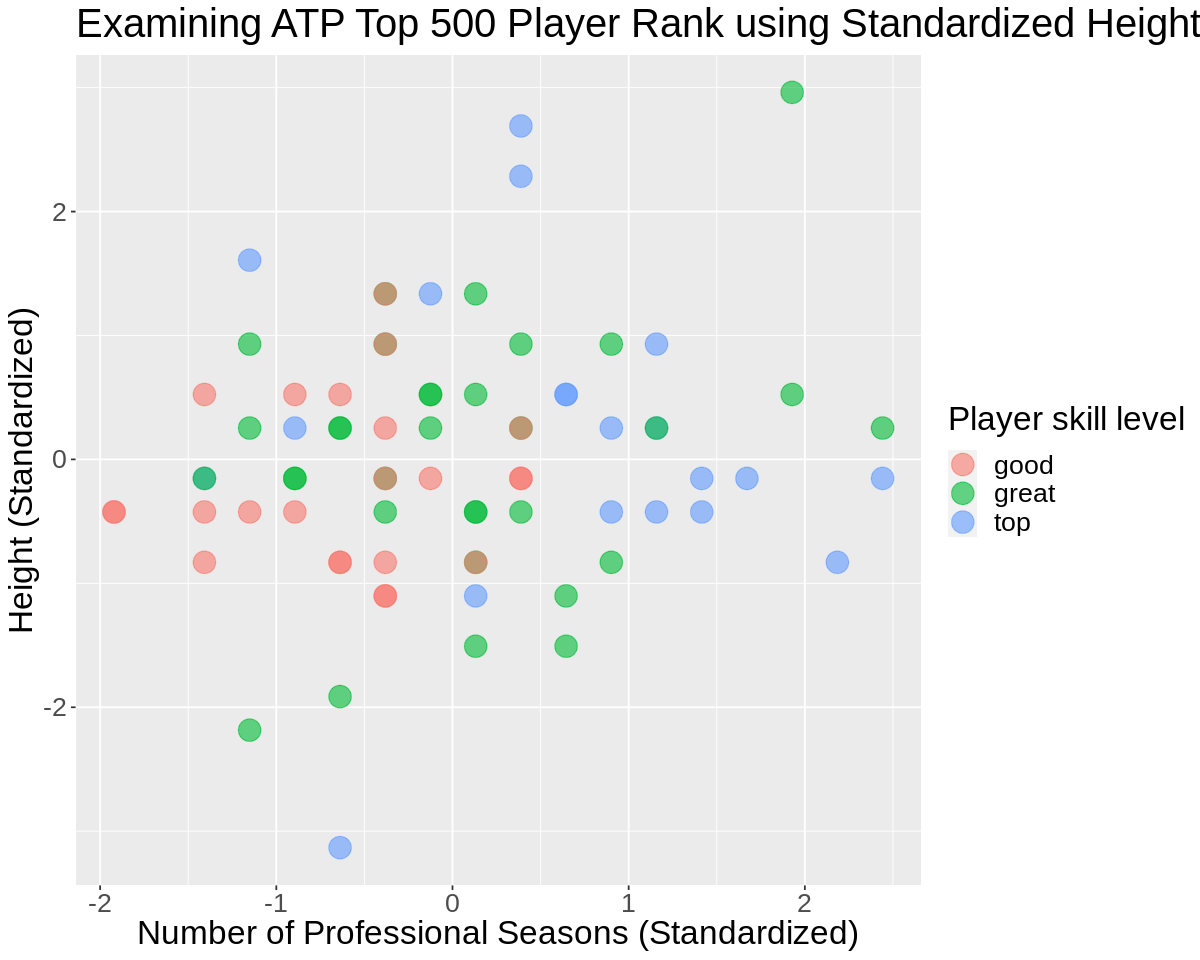

In [24]:
seas_height_stats <- player_stats_training %>%
    select(Seasons, Height_cm, player_level)

seas_height_recipe <- recipe(player_level ~ ., data = seas_height_stats) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) %>%
    prep()

season_height_scaled <- bake(seas_height_recipe, seas_height_stats)

options(repr.plot.width = 10, repr.plot.height = 8)
seas_height_plot <- season_height_scaled %>%
    ggplot(aes(x = Seasons, y = Height_cm, colour = player_level)) +
    geom_point(alpha = 0.6, size = 6) +
    ggtitle("Examining ATP Top 500 Player Rank using Standardized Height against Number of Seasons Played") +
    labs(x = "Number of Professional Seasons (Standardized)",
         y = "Height (Standardized)",
         colour = "Player skill level") +
    theme(text = element_text(size = 20))

seas_height_plot

**Figure 3.2.1**

From this graph, we can see that the player level classes are roughly grouped side by side. This potentially indicates that the number of seasons is having a larger influence on level, versus height. 

In [11]:
set.seed(2021)
# center and scale data in recipe 
player_recipe <- recipe(player_level ~ + Height_cm + Seasons, data = player_stats_training) %>%
   step_scale(all_predictors()) %>%
   step_center(all_predictors())
player_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

### 4. Cross-Validation

To begin our training with currently unknown value k, we use a 10-fold cross-validation.

In [12]:
set.seed(2021)
player_vfold <- vfold_cv(player_stats_training, v = 10, strata = player_level)

#### 4.1 Tuning our data

We tune our data because we don't know which k-value to use yet. This process will help us visualize and decide which k-value provides the highest accuracy in the context of our model.

In [13]:
set.seed(2021)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
      set_engine('kknn') %>%
      set_mode('classification')

k_vals <- tibble(neighbors = seq(from = 1, to = 40, by = 2))

player_results <- workflow() %>%
    add_recipe(player_recipe) %>%
    add_model(knn_tune) %>%
    tune_grid(resamples = player_vfold, grid = k_vals) %>%
    collect_metrics()

accuracies <- player_results %>%
    filter(.metric == "accuracy")
head(accuracies)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.5365079,10,0.07556326,Model01
3,accuracy,multiclass,0.4619048,10,0.06085576,Model02
5,accuracy,multiclass,0.4952381,10,0.04525588,Model03
7,accuracy,multiclass,0.5015873,10,0.05840273,Model04
9,accuracy,multiclass,0.5079365,10,0.05173294,Model05
11,accuracy,multiclass,0.5301587,10,0.04415375,Model06


**Figure 4.1.1**

To better understand what our accuracy table means, we visualize it in a line plot:

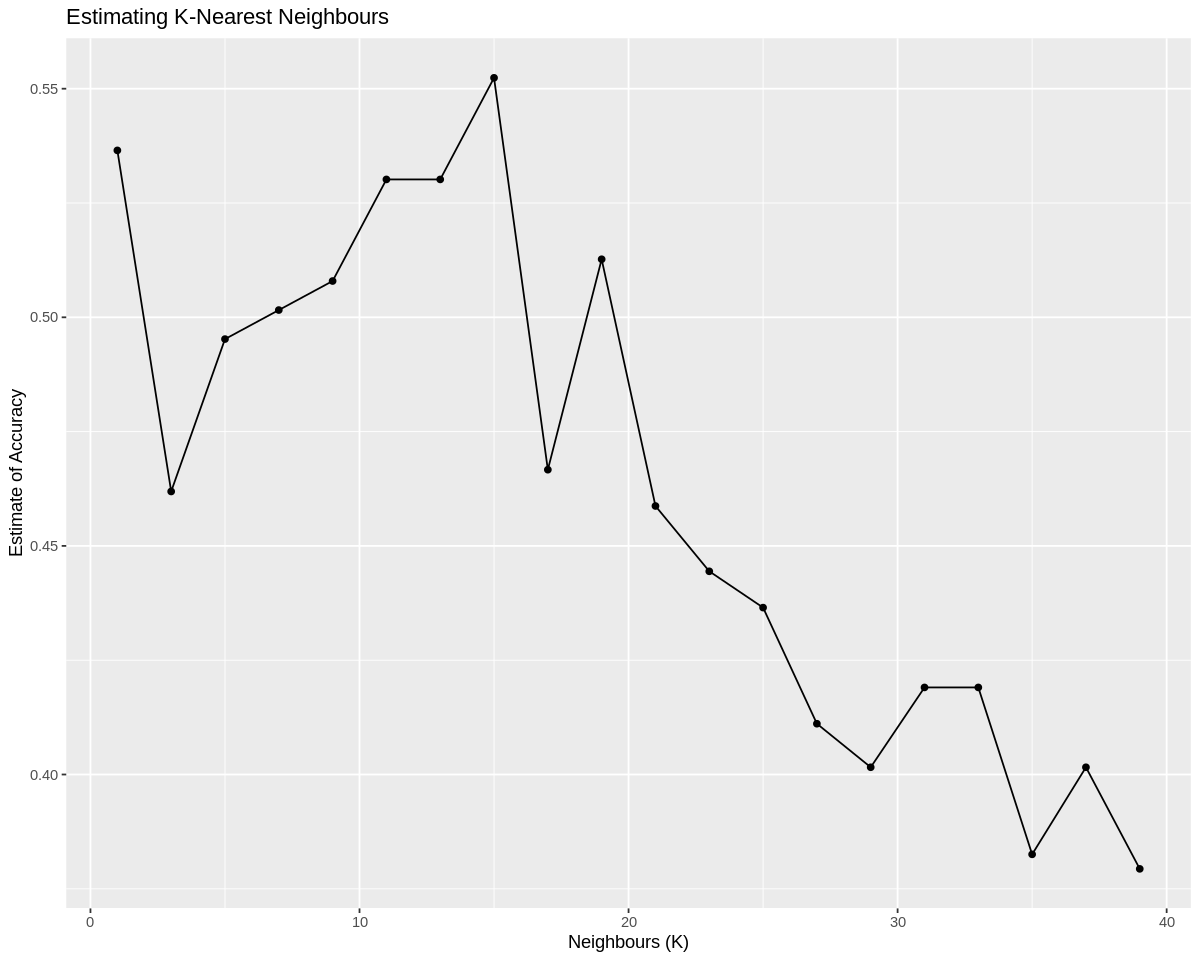

In [21]:
set.seed(2021)

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                geom_point() +
                geom_line() +
                xlab("Neighbours (K)") +
                ylab("Estimate of Accuracy") +
                ggtitle("Estimating K-Nearest Neighbours")
cross_val_plot

**Figure 4.1.2**

k = 19. This value for K is selected because it provides roughly optimal accuracy (53% vs 57%) and changing the value to a nearby number of neighbours doesn't significantly change the accuracy, which makes our model more reliable in the presence of uncertainty. Conversely, choosing either 17 (55%) or 25 (57%) yields a higher accuracy, but changing k by a small amount leads to a significant change in accuracy, thus making the model less reliable.

In this next step, we retrain our model using our selected k value and consequently measure its' accuracy against test predictions. In our table below, it shows  that our accuracy estimate is of about 0.56 or 56%.

In [15]:
set.seed(2021)

player_tuned_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 19) %>%
    set_engine("kknn") %>%
    set_mode("classification")

player_fit <- workflow() %>%
    add_recipe(player_recipe) %>%
    add_model(player_tuned_spec) %>%
    fit(data = player_stats_training)

player_test_predictions <- predict(player_fit, player_stats_testing) %>%
    bind_cols(player_stats_testing)

model_accuracy <- player_test_predictions %>%
    metrics(truth = player_level, estimate = .pred_class) %>%
    filter(.metric == "accuracy")

model_accuracy



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5483871


**Figure 4.1.3**

Consequently, to further visualize this percentage we create a confusion matrix (named "confusion") to see how well our tests have been predicting. According to our produced table, our model succeeded in predicting 17 out of 31 categories (also 55%). 

In [16]:
confusion <- player_test_predictions %>% 
      conf_mat(truth = player_level, estimate = .pred_class)

confusion

          Truth
Prediction good great top
     good     3     1   2
     great    6    11   3
     top      0     2   3

**Figure 4.1.4**

### 5. Training Serena

Next, it is time to introduce our Serena data to the model. In the following cell, we make a prediction for her player level pa

In [17]:
#predict Player Level for Serena Williams
set.seed(2021)
serena_prediction <- predict(player_fit, serena_data) %>%
bind_cols(serena_data)

serena_prediction <- serena_prediction %>%
    rename(player_level = .pred_class)
serena_prediction

player_level,Best_career_rank_to_date,Height_cm,Seasons,Name,Year_turned_pro,Age,Birthdate,Age_turned_pro
<fct>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
top,1,175,24,Serena Williams,1995,38,1981,14


**Figure 5.1**

As we can see, Serena's history of seasons played, young age turned pro (14) and best career rank contributed to her being classified as a top player.

Our next steps involve standardizing Serena's data and appending it to our men's tennis dataset to see how well she would place when being measured in the men's world of tennis. Then, we standardize it to match the format of the rest of our dataset.

In [18]:
#combine serena prediction with rows of the training dataset
player_training_with_serena <- rbind(player_stats_training, serena_prediction)

#create recipe to help with standardization process
serena_recipe <- recipe(player_level ~ + Height_cm + Seasons, data = player_training_with_serena) %>%
   step_scale(all_predictors()) %>%
   step_center(all_predictors()) %>%
   prep()

serena_standardized <- bake(serena_recipe, player_training_with_serena) %>%
     bind_cols(player_training_with_serena$Name)

serena_standardized <- serena_standardized %>%
    rename(Name = "...4") %>%
    filter(Name == "Serena Williams") # ..4 is the name of Serena 
serena_standardized

New names:
* NA -> ...4



Height_cm,Seasons,player_level,Name
<dbl>,<dbl>,<fct>,<chr>
-1.476028,2.780055,top,Serena Williams


**Figure 5.2**

Even when standardized, Serena appears to be a top player when put up against our model, suggesting that height may not be our biggest factor to compare the skills of tennis players.

Finally, we plot the Serena point on our visualization comparing it with the rest of our data! Looking at Figure 5.3 below, we can clearly see that its' nearest neighbours are the blue "top" categories, which lead us to classify the Serena point as ranking in the top level as well.


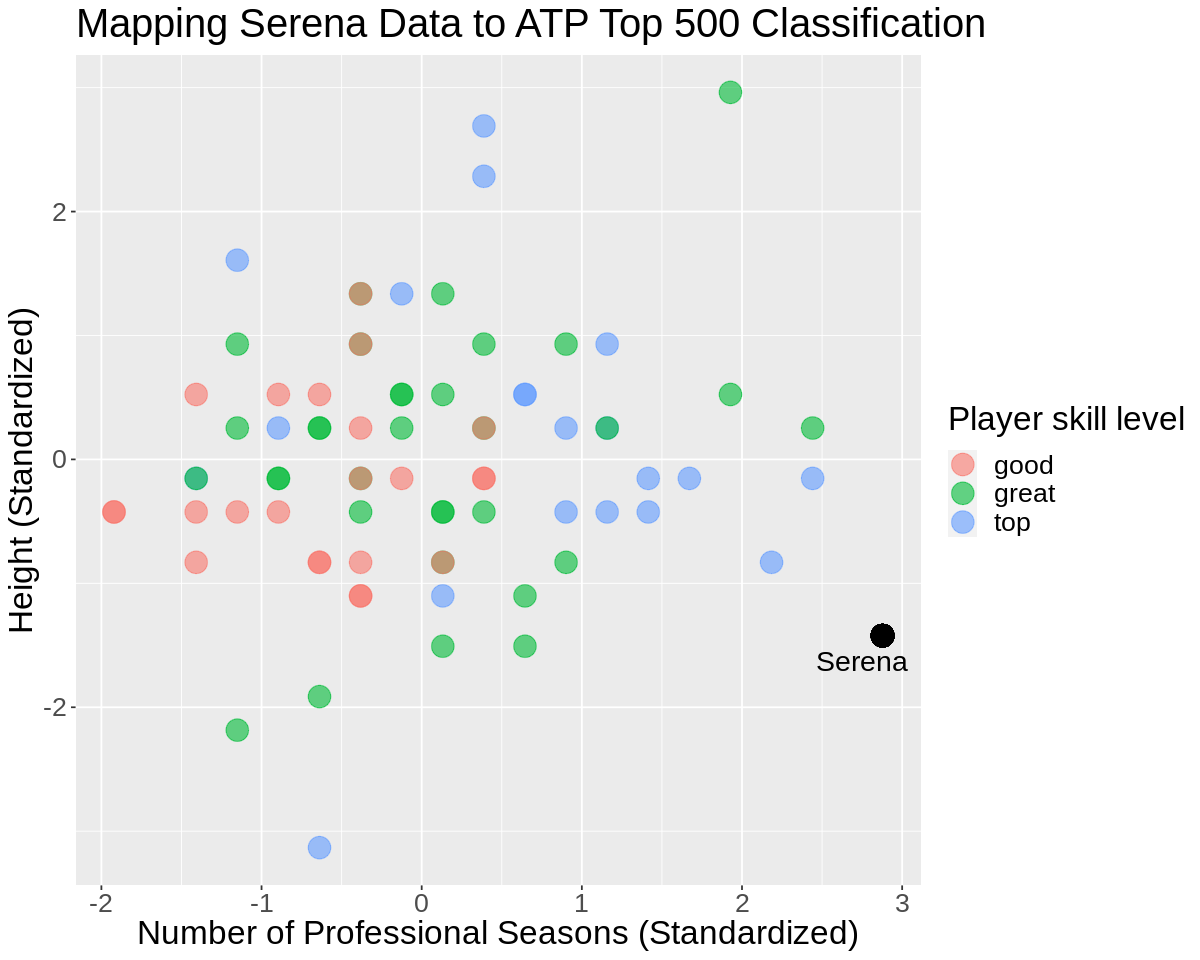

In [19]:
#graph location of serena point
set.seed(2021)

options(repr.plot.width = 10, repr.plot.height = 8)
seas_height_plot +
    geom_point(aes(x = 2.877747, y = -1.42267), colour = "black", size = 6) +
    annotate("text", x = 2.75, y = -1.63, label = "Serena", size = 6) +
    ggtitle("Mapping Serena Data to ATP Top 500 Classification")

**Figure 5.3**

## Discussion

To perform our analysis, we utilitzed the k-nearest neighbours classification algorithm (Timbers et al, 2021). Our final model used player height, in centimeters, and number of professional seasons played, to predict the category of player skill that they should fall in. We ended up disregarding our Age Turned Pro predictor in our further evaluations, because as explained in our exploratory analysis (3.2), there was no correlation with the best rank to date. These categories, defined as the top ten players fall in to the "top" category, players ranked 11-40 fall in to the "great" category, and all other players fall in to the "good category". Based upon parameter optimization, we found that using the nearest 19 neighbours yielded the best accuracy. Our final model has an estimated accuracy of 56%. We then used this model to predict the category of Serena Williams. The model predicted the category of player skill of Serena Williams to be "top". <br>

We initally assumed physical stature (height) would negatively influence how Serena Williams was classified. Based on our results, the number of seasons played had a greater influence on classification, relative to height. This is impactful in the world of tennis, and could help figures such as coaches encourage their trainees to try entering the professional world at a younger age, to experience more seasons and build up their skills in a competitive environment. <br>

However, although experience proved to be beneficial, we also encountered many limitations from assumptions we've made. The limitations of this model exist in part due to a lack of knowledge on what predictors stratify male and female top tennis players, if there even are any to begin with. We are assuming that tennis players are consistent and static in their plays, and that they play the same way against males and females alike (even though our data only mentions male vs male tournaments). This report highlights the need for data to be collected on matches that occur between top male and top female players. Future studies could involve either hosting a tournament between elite men and women tennis players and collecting data, or the compiling of existing data into a tidy dataset. With time and funding, such co-ed trials could be conducted.

Even with these suggestions, it is important to note that tennis is such a uniquely individual sport, and there are so many intricacies that could be predictors (eg: mental health on a playday, the weather, the crowd pressures, what kind of court they're playing on, etc) - this contributed to our low accuracy score. This analysis could definitely be confined and trialed, but it would require much more data collection, as well as many more variables to control. 

Overall, this analysis was incredibly interesting for us to explore, and although we can't control for all predictors and variables, we are confident that women are underestimated in sport, and that Serena would be a serious threat to the ranking of men in the top ATP 500.

## References

Sackmann, J. (2018, September 01). How Much Does Height Matter in Men's Tennis? Retrieved August 14, 2020, from http://www.tennisabstract.com/blog/2017/09/04/how-much-does-height-matter-in-mens-tennis/

Serena Williams. (2021, December 1). In Wikipedia. https://en.wikipedia.org/w/index.php?title=Serena_Williams&oldid=1058053297

Timbers, T. -A., Campbell, T., & Lee, M. (2021). Data Science: A First Introduction. https://ubc-dsci.github.io/introduction-to-datascience/index.html

Data Set: https://www.ultimatetennisstatistics.com/